In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

### Limpeza nos dados


In [3]:
data = pd.read_csv('responses.csv')

In [4]:
#Quantidade de nulos por coluna
data.isnull().sum()

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Left - right handed         3
Education                   1
Only child                  2
Village - town              4
House - block of flats      4
Length: 150, dtype: int64

In [5]:
#Deletando os valores nulos
data = data.dropna() 

In [6]:
colunas_categoricas = data.select_dtypes(include = ['object','category']).columns 

#Deletando as colunas categoricas pois elas não podem entrar na comparação
data = data.drop(colunas_categoricas, axis=1)


### Representação em grafo das primeiras 20 colunas do dataset

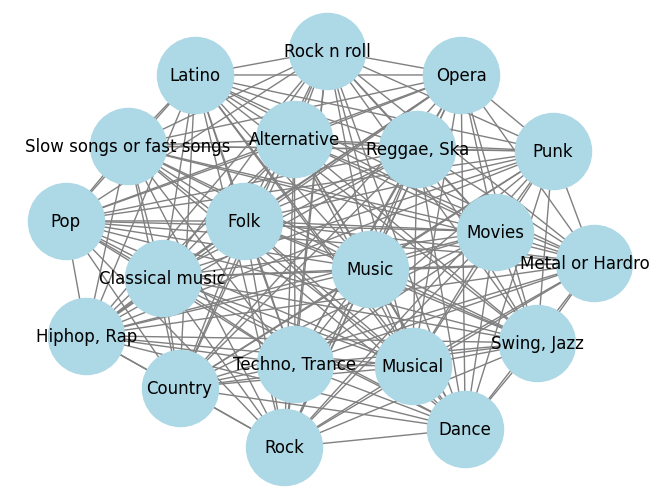

In [10]:
#Splitando o dataset nas 20 primeiras colunas
data_subset = data.iloc[:, :20]

#Criando uma matriz de similaridade usando similaridade dos cossenos
similarity_matrix = cosine_similarity(data_subset.T)

#Declarando o grafo
G = nx.Graph()

#Adicionando os vértices
for gosto in data_subset.columns:
    G.add_node(gosto)

#Adicionando as arestas
num_gostos = len(data_subset.columns)
for i in range(num_gostos):
    for j in range(i+1 , num_gostos):
            G.add_edge(data_subset.columns[i], data_subset.columns[j])  

# Desenhar o gráfo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, edge_color='gray', font_size=12)
plt.show()

### Representação em grafo de 20 colunas aleatórias

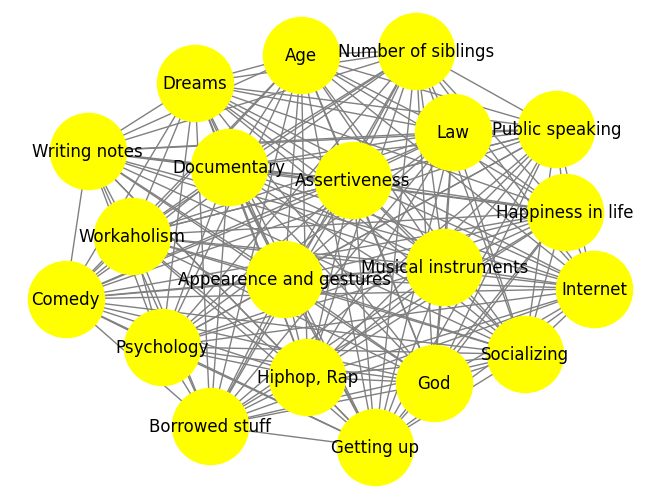

In [11]:
# Selecionar 20 colunas aleatórias
data_subset = data.sample(axis=1, n=20,random_state = 7)

# Calcular a matriz de similaridade
similarity_matrix = cosine_similarity(data_subset.T)

# declarar o grafo
G = nx.Graph()

# Adicionando vértices ao grafo
for gosto in data_subset.columns:
    G.add_node(gosto)

# Adicionando arestas ao grafo 
num_gostos = len(data_subset.columns)
for i in range(num_gostos):
    for j in range(i+1, num_gostos):
        G.add_edge(data_subset.columns[i], data_subset.columns[j])

# Desenhar o grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='yellow', node_size=3000, edge_color='gray', font_size=12)
plt.show()
